##Shout Option
Shout Option(샤웃 옵션)은 옵션 보유자가 옵션 기간 중에 한 번, 또는 여러 번 "샤웃"하여 현재 기초 자산 가격을 고정할 수 있는 옵션입니다. 샤웃한 시점의 가격과 만기 시점의 가격 중 더 유리한 쪽을 선택하여 옵션의 페이오프를 결정합니다. 이 옵션은 일반적으로 투자자에게 유리하게 작용합니다.



Shout Option Price: -0.88


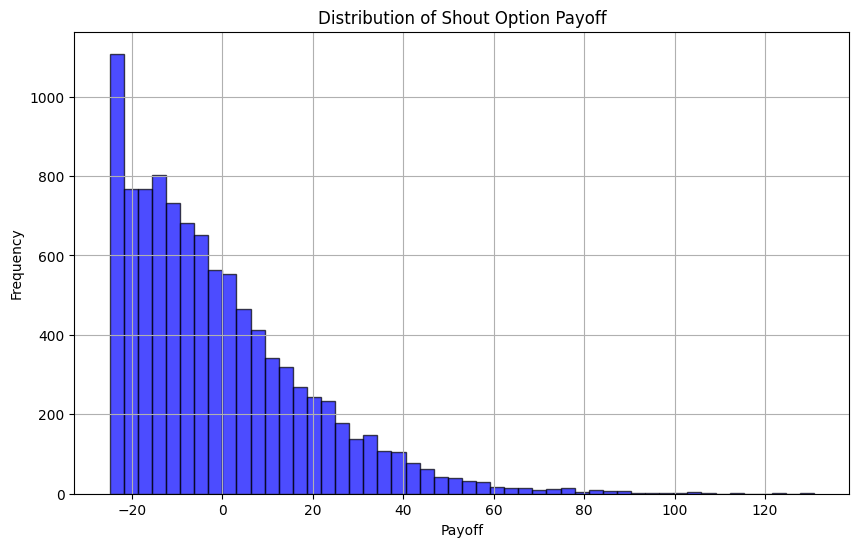

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def simulate_stock_paths(S0, r, sigma, T, M, I):
    """
    주식 가격 경로 시뮬레이션 함수

    Parameters:
    S0: 초기 주식 가격
    r: 무위험 이자율
    sigma: 변동성
    T: 만기 시간 (단위: 년)
    M: 기간 수 (단위: 일)
    I: 시뮬레이션 수

    Returns:
    주식 가격 경로 배열 (I x M)
    """
    dt = T / M
    paths = np.zeros((I, M + 1))
    paths[:, 0] = S0
    for t in range(1, M + 1):
        z = np.random.standard_normal(I)
        paths[:, t] = paths[:, t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * z)
    return paths

def shout_option_payoff(paths, K):
    """
    샤웃 옵션의 페이오프 계산 함수

    Parameters:
    paths: 주식 가격 경로 배열 (I x M)
    K: 행사가격

    Returns:
    샤웃 옵션의 페이오프 배열
    """
    M = paths.shape[1] - 1
    max_shout = np.maximum.accumulate(paths, axis=1)
    payoff = np.maximum(max_shout[:, -1] - K, paths[:, -1] - K)
    return payoff


# 샤웃 옵션 파라미터 설정
S0 = closing_prices[0]  # 초기 주식 가격
r = 0.05  # 무위험 이자율
sigma = 0.2  # 변동성
T = 1  # 만기 시간 (1년)
M = 252  # 기간 수 (일 단위)
I = 10000  # 시뮬레이션 수
K = 150  # 행사가격

# 주식 가격 경로 시뮬레이션
paths = simulate_stock_paths(S0, r, sigma, T, M, I)

# 샤웃 옵션 페이오프 계산
shout_payoffs = shout_option_payoff(paths, K)

# 샤웃 옵션 가격 계산 (할인된 페이오프 평균)
shout_price = np.exp(-r * T) * np.mean(shout_payoffs)
print(f"Shout Option Price: {shout_price:.2f}")

# 시각화
plt.figure(figsize=(10, 6))
plt.hist(shout_payoffs, bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Shout Option Payoff')
plt.xlabel('Payoff')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
